# Step 1: Setup and Data Loading

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Photon
from haversine import haversine, Unit
from datetime import datetime
import holidays
from meteostat import Point, Hourly

In [50]:
completed_orders_path = '../data/nb.csv'
drivers_location_path = '../data/driver_locations_during_request.csv'


In [51]:
completed_orders = pd.read_csv(completed_orders_path)
drivers_location = pd.read_csv(drivers_location_path)


In [52]:
completed_orders.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [53]:
drivers_location.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [54]:
completed_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [55]:
completed_orders.isnull().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [56]:
drivers_location.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [57]:
preprocessed_data_path = '../data/preprocessed_data.csv'
preprocessed_df = pd.read_csv(preprocessed_data_path)

In [58]:
preprocessed_df.isnull().sum()

order_id                      0
trip_origin                   0
trip_destination              0
trip_start_time               0
trip_end_time                 0
id                            0
driver_id                     0
driver_action                 0
drivers_lat                   0
drivers_lon                   0
day_of_week                   0
hour_of_day                   0
day_of_month                  0
month                         0
trip_start_date               0
trip_end_date                 0
trip_origin_latitude          0
trip_origin_longitude         0
trip_destination_latitude     0
trip_destination_longitude    0
trip_duration                 0
Day of Week                   0
Hour of Day                   0
Is Weekend                    0
Origin Lat                    0
Origin Lon                    0
Destination Lat               0
Destination Lon               0
Trip Distance (km)            0
Driving Speed (km/h)          0
dtype: int64

In [59]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315991 entries, 0 to 1315990
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   order_id                    1315991 non-null  int64  
 1   trip_origin                 1315991 non-null  object 
 2   trip_destination            1315991 non-null  object 
 3   trip_start_time             1315991 non-null  object 
 4   trip_end_time               1315991 non-null  object 
 5   id                          1315991 non-null  float64
 6   driver_id                   1315991 non-null  float64
 7   driver_action               1315991 non-null  object 
 8   drivers_lat                 1315991 non-null  float64
 9   drivers_lon                 1315991 non-null  float64
 10  day_of_week                 1315991 non-null  object 
 11  hour_of_day                 1315991 non-null  int64  
 12  day_of_month                1315991 non-null  int64  
 1

In [60]:
data_path = '../data/preprocessed_data.csv'
df = pd.read_csv(data_path)

In [61]:
df.head()


,order_id,trip_origin,trip_destination,trip_start_time,trip_end_time,id,driver_id,driver_action,drivers_lat,drivers_lon,...,trip_duration,Day of Week,Hour of Day,Is Weekend,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance (km),Driving Speed (km/h)
0,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,11.0,245597.0,accepted,6.549147,3.392184,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
1,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,12.0,243172.0,rejected,6.570408,3.396597,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
2,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,13.0,243392.0,rejected,6.566144,3.366483,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
3,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,14.0,243281.0,rejected,6.576791,3.389592,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
4,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,15.0,244078.0,rejected,6.577215,3.371172,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845



# Step 2: Basic Feature Engineering
# Convert Trip Start Time and Trip End Time to datetime

In [62]:
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'])
df['trip_end_time'] = pd.to_datetime(df['trip_end_time'])

In [63]:
df['Day of Week'] = df['trip_start_time'].dt.dayofweek
df['Hour of Day'] = df['trip_start_time'].dt.hour

In [64]:
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x in [5, 6] else 0)


In [65]:
df.head(5)

,order_id,trip_origin,trip_destination,trip_start_time,trip_end_time,id,driver_id,driver_action,drivers_lat,drivers_lon,...,trip_duration,Day of Week,Hour of Day,Is Weekend,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance (km),Driving Speed (km/h)
0,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,11.0,245597.0,accepted,6.549147,3.392184,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
1,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,12.0,243172.0,rejected,6.570408,3.396597,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
2,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,13.0,243392.0,rejected,6.566144,3.366483,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
3,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,14.0,243281.0,rejected,6.576791,3.389592,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845
4,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,15.0,244078.0,rejected,6.577215,3.371172,...,34.25,3,10,0,6.565088,3.384441,6.499696,3.350907,8.160545,14.295845


# Step 3: Distance Calculation
 Split latitude and longitude for origins and destinations

In [66]:
df[['Origin Lat', 'Origin Lon']] = df['trip_origin'].str.split(',', expand=True).astype(float)
df[['Destination Lat', 'Destination Lon']] = df['trip_destination'].str.split(',', expand=True).astype(float)


In [67]:
def haversine_distance(row):
    origin = (row['Origin Lat'], row['Origin Lon'])
    destination = (row['Destination Lat'], row['Destination Lon'])
    return haversine(origin, destination, unit=Unit.KILOMETERS)

In [68]:
df['Trip Distance (km)'] = df.apply(haversine_distance, axis=1)


In [69]:
df['Driving Speed (km/h)'] = df['Trip Distance (km)'] /  (df['trip_duration'] * 60/ 3600)


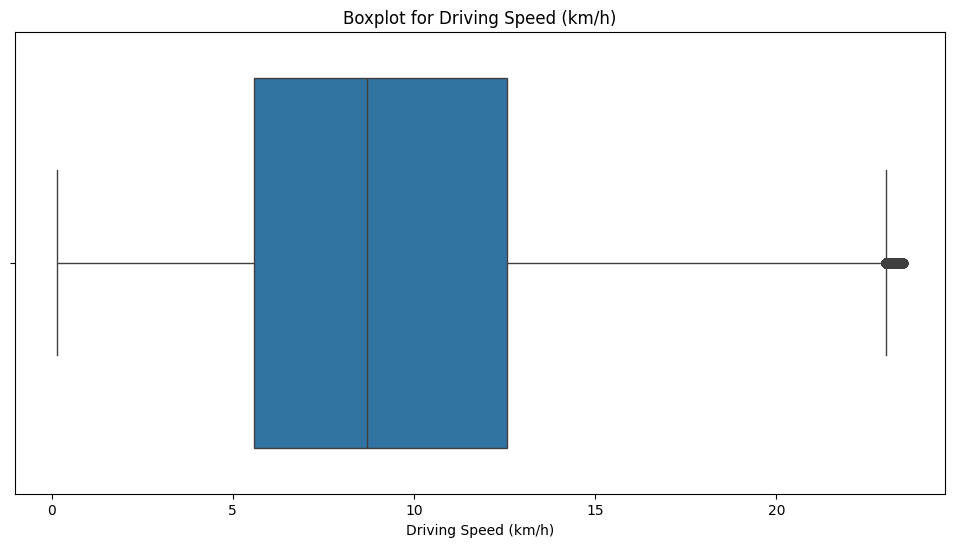

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Driving Speed (km/h)'])
plt.title('Boxplot for Driving Speed (km/h)')
plt.show()

In [71]:
Q1 = df['Driving Speed (km/h)'].quantile(0.25)
Q3 = df['Driving Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [72]:
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

Lower bound: -4.86439123363011
Upper bound: 23.01605775287996


In [73]:
outliers = df[(df['Driving Speed (km/h)'] < lower_bound) | (df['Driving Speed (km/h)'] > upper_bound)]


In [74]:
num_outliers = outliers.shape[0]
print(f'Number of outliers: {num_outliers}')

Number of outliers: 6139


In [75]:
df_cleaned = df[(df['Driving Speed (km/h)'] >= lower_bound) & (df['Driving Speed (km/h)'] <= upper_bound)]


In [76]:
df_cleaned.shape[0]


1309852

In [77]:
df.shape[0]

1315991

In [78]:
df_cleaned.to_csv(data_path, index=False)

# Step 4: Additional Data Integration
 Integrate weather data
 Define location for Lagos, Nigeria

In [79]:
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'])
df['trip_end_time'] = pd.to_datetime(df['trip_end_time'])

In [80]:
lagos = Point(6.5244, 3.3792)
start_date = df['trip_start_time'].min().to_pydatetime()
end_date = df['trip_start_time'].max().to_pydatetime()

In [81]:
# Fetch the weather data
weather_data = Hourly(lagos, start_date, end_date)
weather_data = weather_data.fetch()

In [82]:
weather_data['weather_condition'] = weather_data['coco'].map({
    7: 'Rain', 8: 'Rain', 9: 'Rain', 10: 'Rain', 11: 'Rain',
    12: 'Rain', 13: 'Rain', 14: 'Rain', 15: 'Rain', 16: 'Rain',
    17: 'Rain', 18: 'Rain', 19: 'Rain', 20: 'Rain',
    21: 'Rain', 22: 'Rain', 23: 'Rain', 24: 'Rain',
    25: 'Rain', 26: 'Rain', 27: 'Rain'
}).fillna('No Rain')

In [83]:
weather_data['Is Rain'] = weather_data['weather_condition'].apply(lambda x: 1 if x == 'Rain' else 0)


In [84]:
df['Trip Date '] = df['trip_start_time'].dt.strftime('%Y-%m-%d %H:00:00')
weather_data['date'] = weather_data.index.strftime('%Y-%m-%d %H:00:00')

In [85]:
df_merged = df.merge(weather_data[['date', 'Is Rain']], left_on='Trip Date', right_on='date', how='left')

KeyError: 'Trip Date'

In [ ]:

# # Print debug information
# print(f"Trip Start Time Range: {df['trip_start_time'].min()} to {df['trip_start_time'].max()}")
# print(f"Weather Data Date Range: {weather_data.index.min()} to {weather_data.index.max()}")

# print(df['Trip Date'].head(10))
# print(weather_data['date'].head(10))

# print(df_merged.isnull().sum())
# print(weather_data['weather_condition'].unique())



In [ ]:
df_accepted = df_merged[df_merged['driver_action'] == 'accepted']
df_accepted.head(50)

In [ ]:
expected_index = pd.date_range(start=start_date, end=end_date, freq='H')


In [ ]:
missing_hours = expected_index[~expected_index.isin(weather_data.index)]
print("Missing hours in weather_data:", missing_hours)


In [ ]:
nigerian_holidays = holidays.country_holidays(country='NG', years=[2021, 2022])
df['Is Holiday'] = df['Trip Date'].apply(lambda x: 1 if x in nigerian_holidays else 0)


# Step 5: Feature Extraction and Scaling
Normalize numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_features = ['trip_duration', 'Trip Distance (km)', 'Driving Speed (km/h)']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 6: Geospatial Analysis
Compute the number of riders and orders within circles of 500m


In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
sample_fraction = 0.1  
df_sample = df.sample(frac=sample_fraction, random_state=42)


In [ ]:

coords = df_sample[['Origin Lat', 'Origin Lon']].values
db = DBSCAN(eps=0.5, min_samples=1, metric='haversine').fit(np.radians(coords))
df_sample['Cluster'] = db.labels_

In [ ]:
origin_clusters = df.groupby('Cluster').size().reset_index(name='Num Orders')
destination_clusters = df.groupby(['Destination Lat', 'Destination Lon']).size().reset_index(name='Num Orders')


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Origin Lon', y='Origin Lat', hue='Cluster', palette='viridis')
plt.title('Clusters of Delivery Starting Locations')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Destination Lon', y='Destination Lat', size='Num Orders', sizes=(20, 200), hue='Num Orders', palette='viridis')
plt.title('Distribution of Delivery Destinations')
plt.show()

#